<br/>

Measurement Research within the Python3 Ecosystem
============================================

### [Steffie Jacob Eravuchira](mailto: s.eravuchira@jacobs-university.de) ,  [Vaibhav Bajpai](mailto: v.bajpai@jacobs-university.de) , [Jürgen Schönwälder](mailto: j.schoenwaelder@jacobs-university.de)

School of Engineering and Sciences,  
Campus Ring 1, Jacobs University Bremen,  
Bremen 28759  
Bremen, Germany  

<img id="ripe69" align="left" width="20%" src="http://teamarin.net/wp-content/uploads/2013/11/RIPE-69-London.png">  
<br/><br/><br/><br/><br/>
***

This notebook is available online at: https://github.com/vbajpai/ripe69-python3-toolset

<br/>

<a id="top">Table of Contents</a>
----------------

* [Fetching Multi-Dimensional Data](#fetching-multidim-data)
* [Frictionless SQL Storage](#frictionless-sql-storage)
* [Frictionless Data Retrieval](#frictionless-data-retrieval)
* [Data Analysis](#data-analysis)
* [Data Visualisation](#data-visualization)

<br/><br/><br/>

## <a id="fetching-multidim-data">Fetching Multi-Dimensional Data</a>
<hr/>

* [`requests`](#requests)
* [`requests + atlas.ripe.net`](#requests-ripeatlas)
* [`requests + stat.ripe.net`](#requests-ripestat)

<br/><br/><br/>

<img id="requests" align="left" width="15%" src="http://docs.python-requests.org/en/latest/_static/requests-sidebar.png">

### [`requests` &rarr;](http://docs.python-requests.org)

In [1]:
import requests

#### `get_json_resource_from_absolute_uri(...):`
- Takes an absolute URI to a JSON resource and a dictionary of query parameters
- Performs HTTP GET request on the absolute URI to fetch the JSON resource.
- Returns the JSON resource as a dictionary

In [2]:
def get_json_resource_from_absolute_uri(url, query_params):
    try: res = requests.get(url, params = query_params)
    except Exception as e: print(e, file=sys.stderr)
    else:
        try: res_json = res.json()
        except Exception as e: print(e, file=sys.stderr)
        else: 
            return res_json

#### Example Usage:

In [3]:
import json
url = 'https://en.wikipedia.org/w/api.php'
query_params = {'action': 'query', 'titles': 'Albert_Einstein', 'prop': 'info', 'format': 'json', 'rawcontinue':'true'}
res = get_json_resource_from_absolute_uri(url, query_params)
if res: print(json.dumps(res,indent = 4))

{
    "query": {
        "pages": {
            "736": {
                "ns": 0,
                "contentmodel": "wikitext",
                "lastrevid": 656156313,
                "title": "Albert Einstein",
                "pagelanguage": "en",
                "length": 124542,
                "touched": "2015-04-12T18:40:50Z",
                "pageid": 736
            }
        },
        "normalized": [
            {
                "to": "Albert Einstein",
                "from": "Albert_Einstein"
            }
        ]
    }
}


- - -
<br/><br/><br/>

<img id="requests-ripeatlas" align="left" width="25%" src="https://www-static.ripe.net/static/rnd-ui/atlas/static/page/img/probe-v3.jpg">

### `requests` + [`atlas.ripe.net` &rarr;](http://atlas.ripe.net)

In [4]:
import requests

#### `get_count_registered_atlas_probes(...):`
- Returns the count of registered probes using the [RIPE Atlas probe API &rarr;](https://atlas.ripe.net/docs/rest/#probe)

In [5]:
def get_count_registered_atlas_probes():
    base_uri = 'https://atlas.ripe.net'; url = '%s/api/v1/probe'%base_uri
    try: res = get_json_resource_from_absolute_uri(url, None)
    except Exception as e: print(e, file=sys.stderr)
    else:
        try: total_registered = res['meta']['total_count']
        except Exception as e: print(e, file=sys.stderr)
        else: return total_registered

#### Example Usage:

In [6]:
count = get_count_registered_atlas_probes()
if count: print("# RIPE Atlas Registered Probes: %d"%count)

# RIPE Atlas Registered Probes: 13488


- - -  
<br/>

#### `get_count_connected_atlas_probes(...):`
- Returns the count of connected probes using the [RIPE Atlas probe API &rarr;](https://atlas.ripe.net/docs/rest/#probe)

In [7]:
def get_count_connected_atlas_probes():
    base_uri = 'https://atlas.ripe.net'; url = '%s/api/v1/probe'%base_uri
    offset = 0; limit = 100; connected_objects = 0
    registered_count = get_count_registered_atlas_probes()    
    if not registered_count: return None
    while (offset <= registered_count):
        query_params = {'offset': '%d'%offset, 'limit': '%d'%limit}
        try: res = get_json_resource_from_absolute_uri(url, query_params)
        except Exception as e: print(e, file=sys.stderr); return None
        try: objects = res['objects']
        except Exception as e: print(e, file=sys.stderr); return None
        for object in objects: 
            if object['status'] == 1: connected_objects += 1
        print('.', end='')
        offset = offset + limit
    print('')
    return connected_objects

#### Example Usage:

In [8]:
count = get_count_connected_atlas_probes()
if count: print("# RIPE Atlas Connected probes: %d"%count)

.......................................................................................................................................
# RIPE Atlas Connected probes: 8086


- - -
<br/><br/><br/>

<img id="requests-ripestat" align="left" width="60%" src="http://i.imgur.com/IMYGxf3.png">

###`requests +` [`stat.ripe.net` &rarr;](https://stat.ripe.net)

In [9]:
import requests

#### `get_holder_from_asn(...)`
- Takes ASN as input
- Fetch the holder organization name associated with the ASN using the [RIPEstat Data API &rarr;](https://stat.ripe.net/docs/data_api)
- Returns the fetched organization name associated with the ASN.

In [10]:
def get_holder_from_asn(asn):
    base_uri = 'https://stat.ripe.net'; url = '%s/data/as-overview/data.json'%base_uri
    params = {'resource' : asn}
    try: res = get_json_resource_from_absolute_uri(url, params)
    except Exception as e: print(e, file=sys.stderr)
    try: holder = res['data']['holder']
    except Exception as e: print(e, file=sys.stderr)
    return holder

#### Example:

In [11]:
asn = '15169'
holder = get_holder_from_asn(asn)
print('%s => %s'%(asn, holder))

15169 => GOOGLE - Google Inc.,US


- - -  
<br/>

#### `get_asn_from_endpoint(...):`

- Takes an IP endpoint as input
- Using the [RIPEstat Data API &rarr;](https://stat.ripe.net/docs/data_api)
    - Calculates the 1<sup>st</sup>-level less-specific prefix encompassing the IP endpoint.
    - Fetches the ASN (`ASN`) announcing the prefix.
    - Fetches the holder organization name (`holder`) associated with the ASN. 
- Returns a list of `(ASN, holder)` tuple.

In [12]:
def get_asn_from_endpoint(endpoint):
    asn = holder = None
    base_uri = 'https://stat.ripe.net'; url = '%s/data/prefix-overview/data.json'%base_uri
    params = {'resource' : endpoint}
    try: res = get_json_resource_from_absolute_uri(url, params)
    except Exception as e: print(e, file=sys.stderr); return None
    try:
        asns_holders = []
        for item in res['data']['asns']:
            asn = item['asn']; holder = item['holder']
            asns_holders.append((asn, holder))
    except Exception as e: print(e, file=sys.stderr)
    return asns_holders

#### Example:

In [13]:
ep4 = '8.8.8.8'
ep6 = '2001:4860:4860::8888'

asns_holders_v4 = get_asn_from_endpoint(ep4)
asns_holders_v6 = get_asn_from_endpoint(ep6)

print('%s'%ep4)
for asn, holder in asns_holders_v4: print('=> %d, %s'%(asn, holder))
    
print('\n%s'%ep6)
for asn, holder in asns_holders_v6: print('=> %d, %s'%(asn, holder))

8.8.8.8
=> 15169, GOOGLE - Google Inc.,US

2001:4860:4860::8888
=> 15169, GOOGLE - Google Inc.,US


- - -
<br/>

#### `create_pretty_node_names(...)`
- Takes ASN and associated holder organization name as input
- Returns the pretty-printed form of input

In [14]:
def create_pretty_node_names(asn, holder):
    firstname = holder.split('-')[0].split(' ')[0]
    if 'AS' in str(asn): nodename = '%s (%s)'%(firstname, asn)
    else: nodename = '%s (AS%s)'%(firstname, asn)
    return nodename

#### Example:

In [15]:
node = create_pretty_node_names(asn, holder)
print(node)

GOOGLE (AS15169)


- - -
[Back to Top](#top)
<br/><br/><br/><br/>

## <a id="frictionless-sql-storage">Frictionless SQL storage</a>
<hr/>

* [`pandas + DataFrame`](#pandas-dataframe)
* [`pandas + to_sql`](#pandas-to-sql)

<br/><br/><br/>

<img id="pandas-dataframe" align="left" width="50%" src="http://i.imgur.com/gMN0B9a.png">

### [`pandas` &rarr;](http://pandas.pydata.org/) + `DataFrame`

In [16]:
import pandas as pd

#### `pandas.DataFrame(...)`

- We use the [RIPE Atlas probe archive API &rarr;](https://atlas.ripe.net/docs/rest/#probe-archive)
- We only show few probe API fields for brevity reasons.
- The probe ID is set as the index of the `DataFrame`.

In [17]:
url = 'https://atlas.ripe.net/api/v1/probe-archive/'
res = get_json_resource_from_absolute_uri(url, {'format': json})
df = pd.DataFrame(res['objects'])
df[['id', 'asn_v4', 'asn_v6', 'country_code', 'status_name', 'tags']].head()


,id,asn_v4,asn_v6,country_code,status_name,tags
0,1,6830,NaN,NL,Connected,"[cable, home, nat, system-v1, system-resolves-..."
1,2,5615,NaN,NL,Connected,"[home, nat, system-v1, system-resolves-a-corre..."
2,3,3265,3265,NL,Connected,"[home, nat, system-v1, system-resolves-a-corre..."
3,4,3265,3265,NL,Connected,"[dsl, home, nat, native-ipv6, system-v1, syste..."
4,5,3265,3265,NL,Connected,"[home, nat, system-v1, system-resolves-a-corre..."


- - -
<br/><br/><br/>

### <a id="pandas-to-sql">`pandas` + `to_sql(...)`</a>

####`sqlite3.connect(...)` function:

Connects to a `sqlite3` database:
- Creates the database if it does not exist, or
- Connects to the databse if it exists 

In [18]:
import sqlite3
DBNAME = 'ripe69-toolset.db'
con = sqlite3.connect(DBNAME)

We need to unbox DataFrame columns of a object datatype into a string representation to allow insertion into a SQL table

In [19]:
for c in df.columns:
    if df[c].dtype == object: df[c] = df[c].astype(str)

In [20]:
df = df.set_index('id')

####`DataFrame.to_sql(...)`:

Write DataFrame records to a SQL database table:
- Creates the table (with the supplied table name) if it does not exit.
- Overwrites if the table (with the suppleid table name) exists.
- Inserts the records within a DataFrame into the table.

In [21]:
try: cur = con.execute('pragma foreign_keys=ON')
except Exception as e: print(e, file=sys.stderr)
else:
    TABLENAME = 'ra_probe_api_2014'
    try:
        df.to_sql( '%s'%TABLENAME
                  , con
                  , flavor='sqlite'
                  , if_exists = 'replace'
                  , index_label = 'id'
                 )
    except Exception as e: print(e, file=sys.stderr)
con.commit()

- - -
[Back to Top](#top)
<br/><br/><br/><br/>

## <a id="frictionless-data-retrieval">Frictionless Data Retrieval</a>
<hr/>

### `pandas` + `read(...)`

####`pd.read(...)` function:
- Takes a SQL connection object and a SQL query as input.
- Applies the SQL query on the connected database and returns a `pandas DataFrame` 

In [22]:
query = '''select id, asn_v4, asn_v6, country_code, status_name, tags from %s'''%TABLENAME
df = pd.read_sql(query, con)
df.head()

,id,asn_v4,asn_v6,country_code,status_name,tags
0,1,6830,NaN,NL,Connected,"['cable', 'home', 'nat', 'system-v1', 'system-..."
1,2,5615,NaN,NL,Connected,"['home', 'nat', 'system-v1', 'system-resolves-..."
2,3,3265,3265,NL,Connected,"['home', 'nat', 'system-v1', 'system-resolves-..."
3,4,3265,3265,NL,Connected,"['dsl', 'home', 'nat', 'native-ipv6', 'system-..."
4,5,3265,3265,NL,Connected,"['home', 'nat', 'system-v1', 'system-resolves-..."


- - -
[Back to Top](#top)
<br/><br/><br/><br/>

## <a id="data-analysis">Data Analysis</a>
<hr/>

### <a id="ipaddress">`python3 ipaddress`</a>

In [23]:
import ipaddress

####`ipaddress.ip_address(...)` :
Creates an IPv4/ipv6 address object from the input string  

In [24]:
try: 
    myipv4 = ipaddress.ip_address(ep4)
    myipv6 = ipaddress.ip_address(ep6)
except Exception as e:  print(e, file=sys.stderr)
else: 
    print('%s => %s'%(myipv4, type(myipv4)))
    print('%s => %s'%(myipv6, type(myipv6)))

8.8.8.8 => <class 'ipaddress.IPv4Address'>
2001:4860:4860::8888 => <class 'ipaddress.IPv6Address'>


####`ipaddress.is_private`:

- Returns `True` if IP endpoint is Private [RFC1918 &rarr;](https://tools.ietf.org/html/rfc1918)
- Returns `False` if IP endpoint is not Private [RFC1918 &rarr;](https://tools.ietf.org/html/rfc1918)

In [25]:
print('Is %s Private [RFC1918]? => %s'%(myipv4, myipv4.is_private))

Is 8.8.8.8 Private [RFC1918]? => False


####`ipaddress.version`:

- Returns 4 if IP endpoint is IPv4.
- Returns 6 if IP endpoint is IPv6.


In [26]:
print("%s => IPv%s"%(myipv4, myipv4.version))
print("%s => IPv%s"%(myipv6,myipv6.version))

8.8.8.8 => IPv4
2001:4860:4860::8888 => IPv6


- - -
[Back to Top](#top)
<br/><br/><br/><br/>

## <a id="data-visualization">Data Visualization</a>
<hr/>

<img id="requests" align="left" width="55%" src="http://i.imgur.com/3IdNzuN.png">

### `pandas + matplotlib`

- Uses `Pandas.read_sql(...)` to read the probe ID and ASN v4 from the sqlite3 table (dump of the probe API data).
- Uses `DataFrame.groupby(...)` to group the probe IDs by ASN v4.
- Uses `DataFrameGroupby.agg(...)` to aggregate by counting the number of probes behind each ASN v4.
- Uses `DataFrame.sort(...)` to sort the ASN v4 aggregates by number of probes.

In [27]:
query = '''select id, asn_v4 from %s'''%TABLENAME
df = pd.read_sql(query, con)
dfgroupby = df.groupby('asn_v4')
dfagg = dfgroupby.agg(len)
dfsort = dfagg.sort('id', ascending=False)
df = dfsort.reset_index().reset_index()
df['index'] = df['index'].apply(lambda x: x+1)

- Uses `DataFrame.plot(...)` to plot the distribution of number of probes by ASN index (designated by the number of deployed probes).

Populating the interactive namespace from numpy and matplotlib


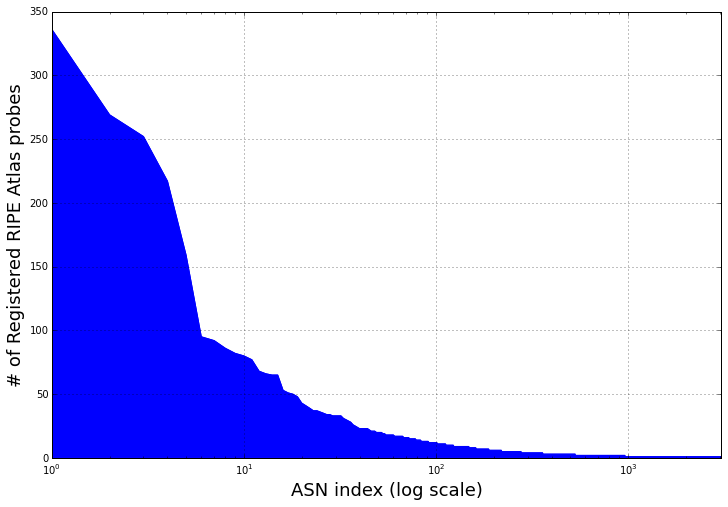

In [29]:
%pylab inline
ax = df.plot('index', 'id', logx = True, kind = 'area', legend = False, figsize = (12,8))
ax.set_ylabel("# of Registered RIPE Atlas probes", fontsize=18)
ax.set_xlabel("ASN index (log scale)", fontsize=18)

[Back to Top](#top)
<br/><br/><br/><br/>

<img id="requests" align="left" width="55%" src="http://i.imgur.com/qqwclZR.png">

### Work Supported by Leone Project: [leone-project.eu &rarr;](http://leone-project.eu/) ###